In [4]:
import filterM
import cv2
import time
from matplotlib import pyplot as plt
import math
import numpy as np
from PIL import Image
from PIL import ImageChops
import scipy.misc
np.seterr(over = 'ignore')



{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

среднеквадратичное отклонение по каналам оригинала и зашумленного
r: 8.977222219479433
g: 8.593108260253567
b: 9.407636110434611
среднеквадратичное отклонение по каналам оригинала и отфильтрованного VMF
r: 5.028452355912546
g: 4.80764262657065
b: 4.631259284643542
среднеквадратичное отклонение по каналам оригинал и встроенный фильтр
r: 7.67920347927012
g: 5.684083752979464
b: 9.422783873179547


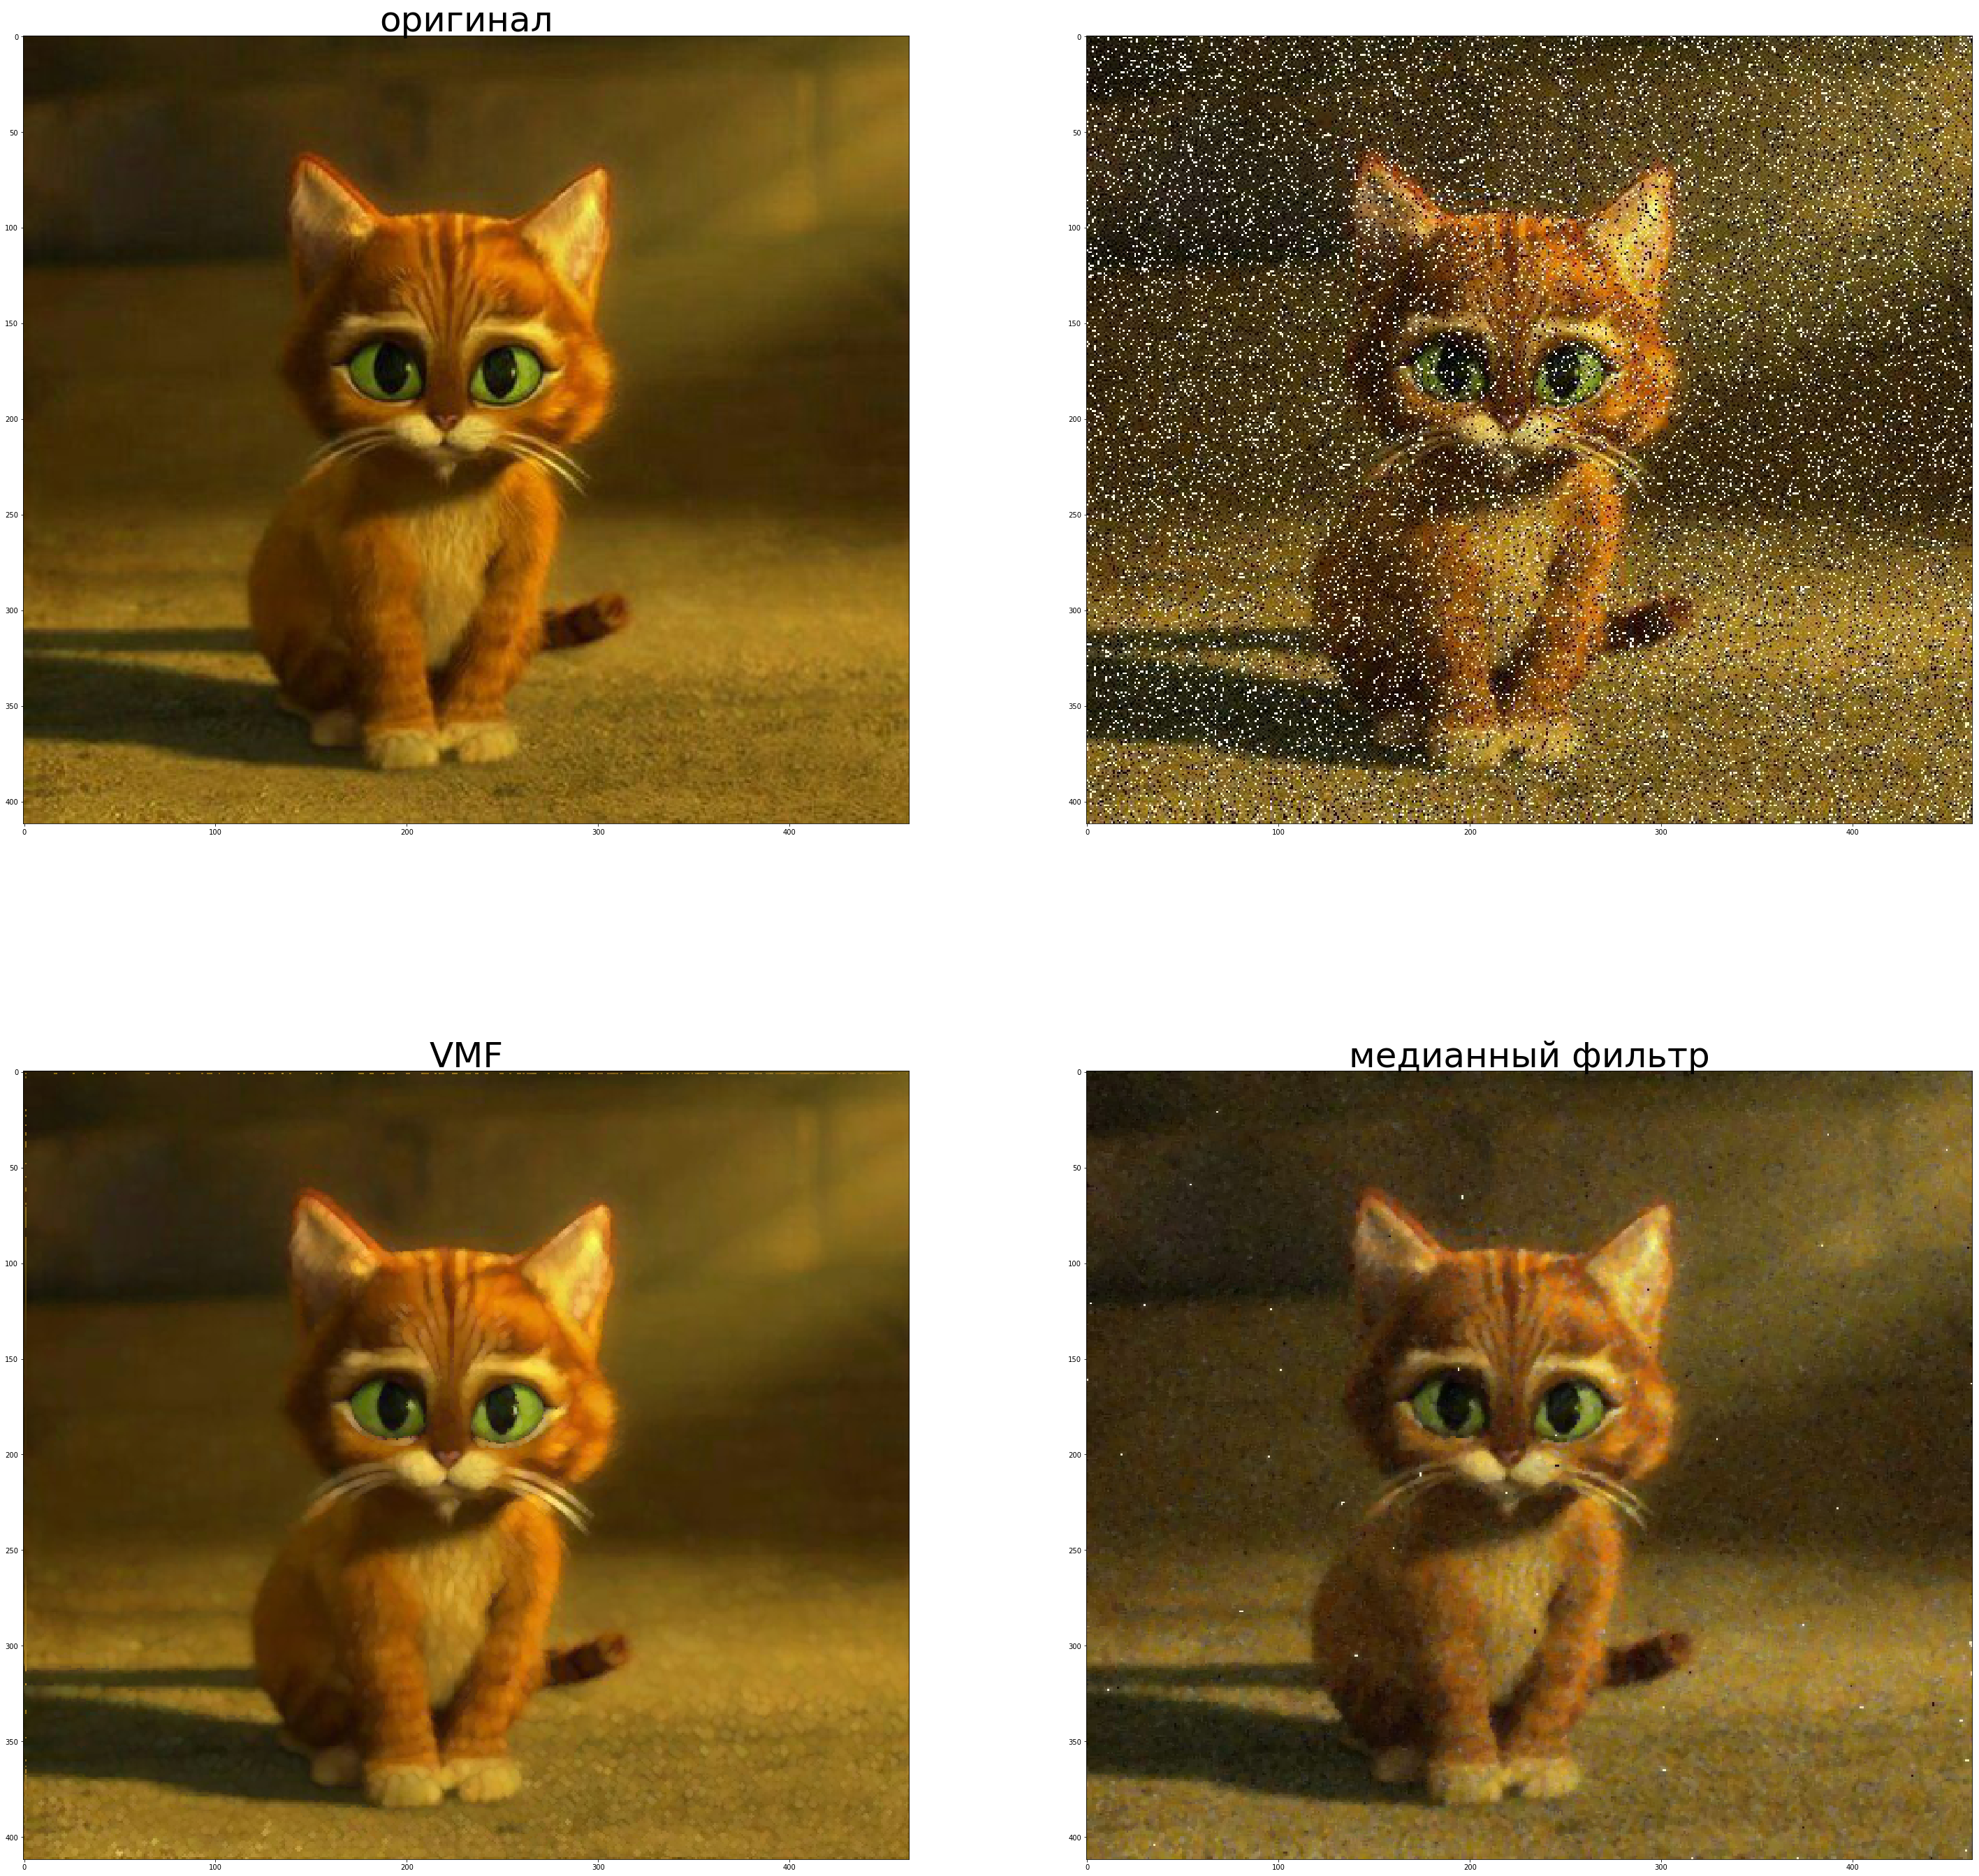

6.442828087137353
73.56591914944455


In [15]:
#Оригинальное изображение
img =cv2.imread("kotOriginal2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(50,50))
plt.subplot(221)
plt.title('оригинал',fontsize = 50)
plt.imshow(img)
plt.subplot(222)
#Зашумленное изображение
img2 = cv2.imread("kotSh2.jpg")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
r = 1
#Отфильтрованное векторным медианным фильтром
nimg = filterM.Filter(r,img).VMF()
# cv2.imwrite("myfilter.jpg",nimg)
scipy.misc.imsave('myfilter.jpg',nimg)
plt.subplot(223)
plt.title('VMF',fontsize = 50)
plt.imshow(nimg)
numP = math.sqrt(img.shape[0]*img.shape[1])
M = img.shape[0]
N = img.shape[1]
qr = math.sqrt(np.sum((img[:,:,0]-img2[:,:,0])**2))/numP
qg = math.sqrt(np.sum((img[:,:,1]-img2[:,:,1])**2))/numP
qb = math.sqrt(np.sum((img[:,:,2]-img2[:,:,2])**2))/numP

print("среднеквадратичное отклонение по каналам оригинала и зашумленного")
print("r: "+str(qr))
print("g: "+str(qg))
print("b: "+str(qb))
qr = math.sqrt(np.sum((img[:,:,0]-nimg[:,:,0])**2))/numP
qg = math.sqrt(np.sum((img[:,:,1]-nimg[:,:,1])**2))/numP
qb = math.sqrt(np.sum((img[:,:,2]-nimg[:,:,2])**2))/numP
print("среднеквадратичное отклонение по каналам оригинала и отфильтрованного VMF")
print("r: "+str(qr))
print("g: "+str(qg))
print("b: "+str(qb))
#Встроенный фильтр
f = cv2.medianBlur(img2,3)
# cv2.imwrite("cvfilter.jpg",f)
scipy.misc.imsave('cvfilter.jpg', f)
plt.subplot(224)
plt.title('медианный фильтр',fontsize = 50)
plt.imshow(f)
print("среднеквадратичное отклонение по каналам оригинал и встроенный фильтр")
qr = math.sqrt(np.sum((img[:,:,0]-f[:,:,0])**2))/numP
qg = math.sqrt(np.sum((img[:,:,1]-f[:,:,1])**2))/numP
qb = math.sqrt(np.sum((img[:,:,2]-f[:,:,2])**2))/numP
print("r: "+str(qr))
print("g: "+str(qg))
print("b: "+str(qb))
plt.show()
MSE = np.sum((img2[:,:,0]-nimg[:,:,0])**2+(img2[:,:,1]-nimg[:,:,1])**2+(img2[:,:,2]-nimg[:,:,2])**2)/(3*M*N)
PSNR = 20*math.log(255/math.sqrt(MSE))
print(math.sqrt(MSE))
print(PSNR)

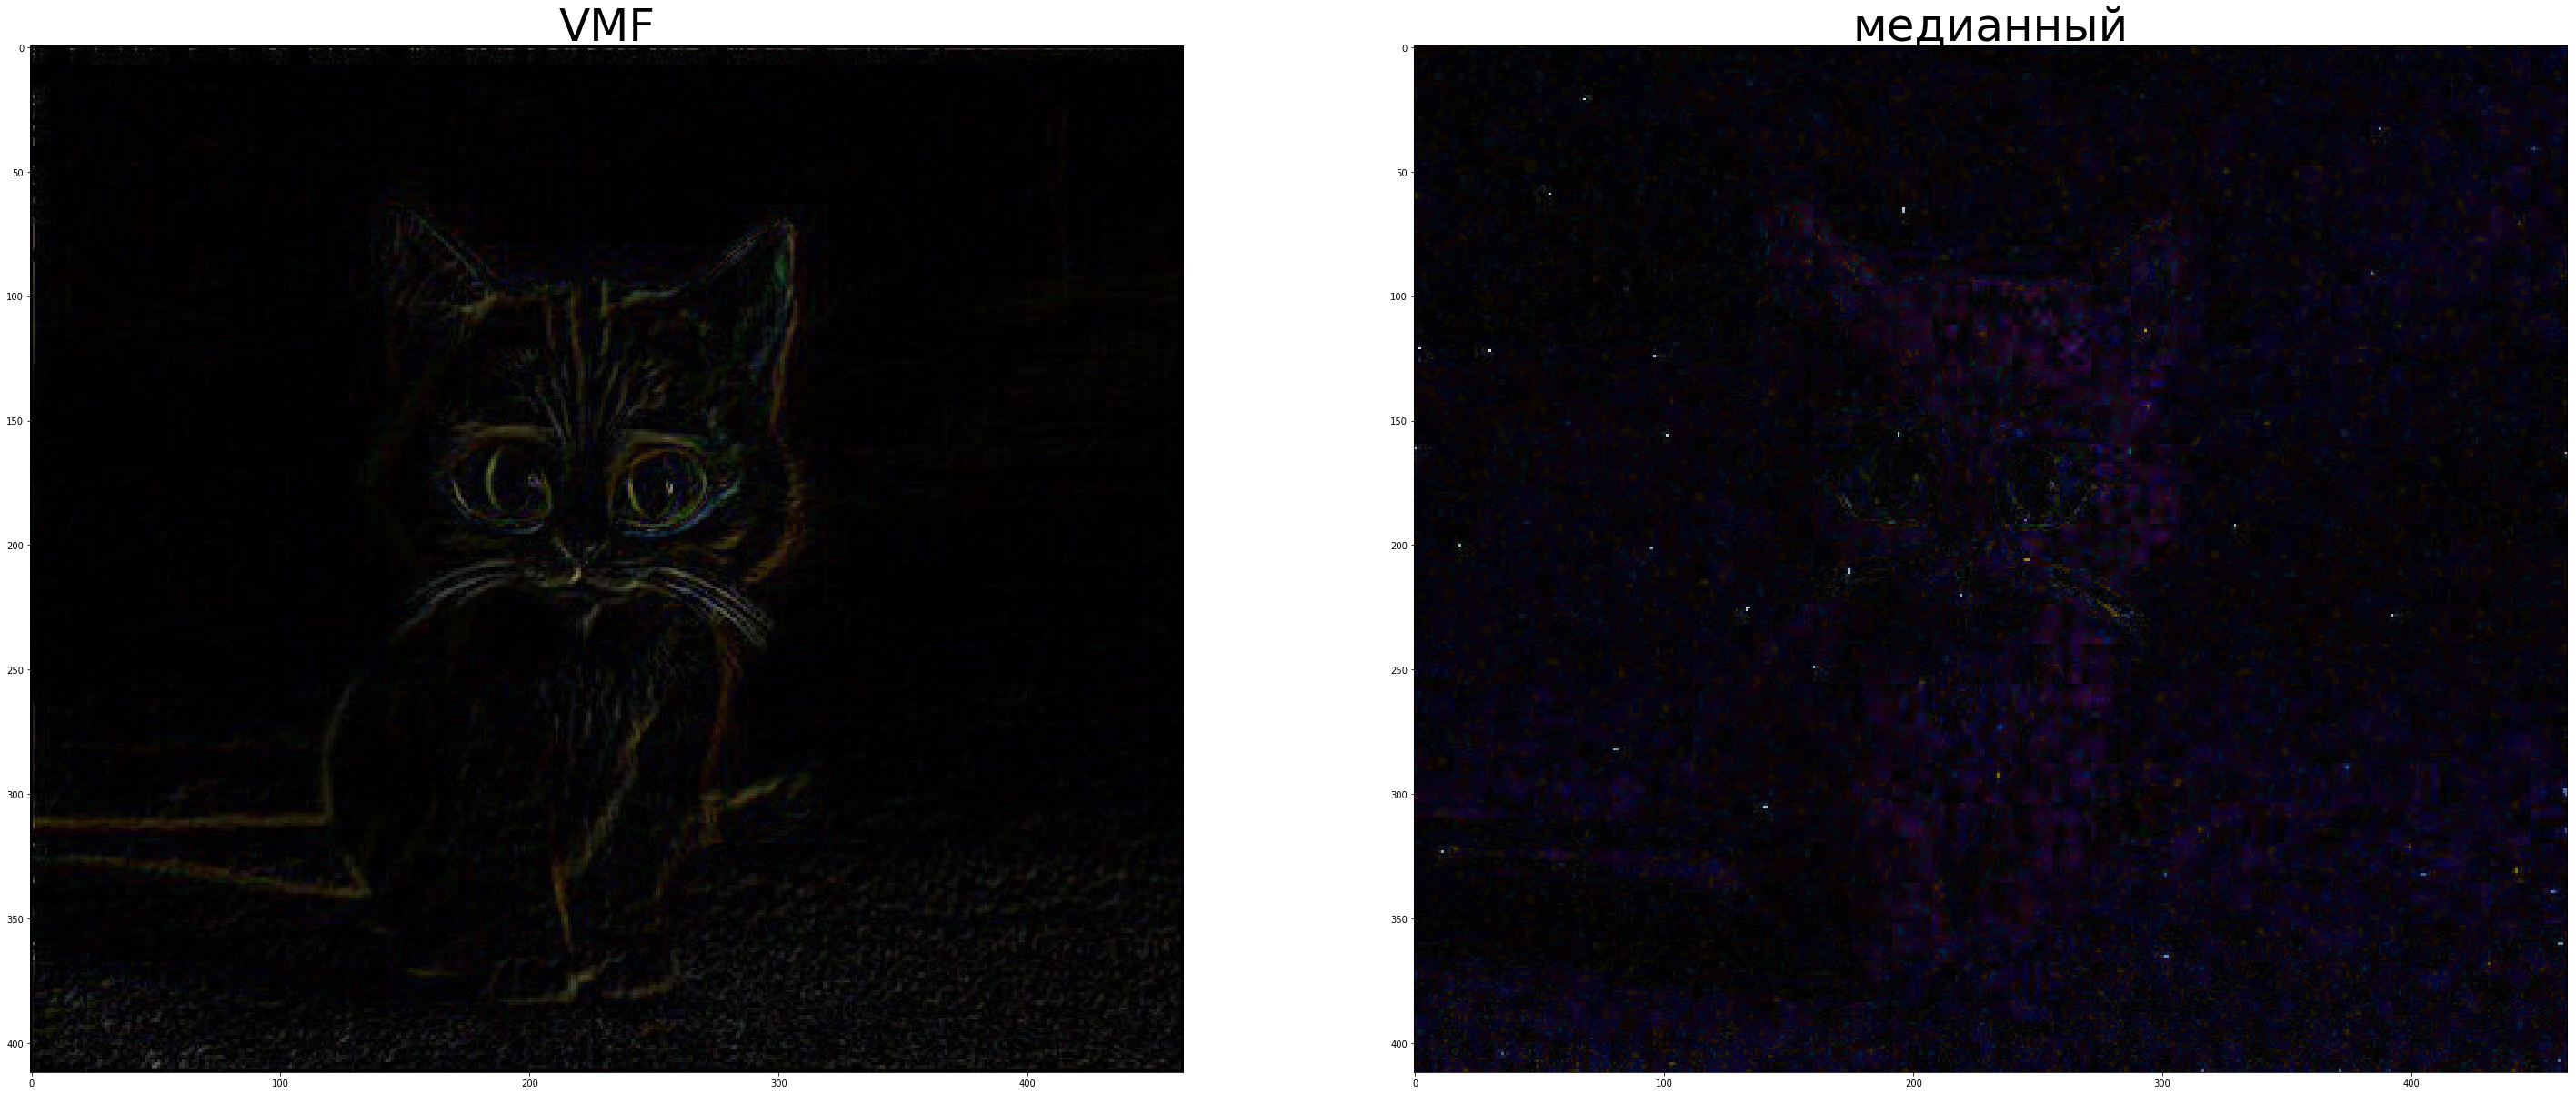

In [14]:
imOr = Image.open("kotOriginal2.jpg")
im1 = Image.open("myfilter.jpg")
im2 = Image.open("cvfilter.jpg")
diff1 = ImageChops.difference(imOr,im1)
diff2 = ImageChops.difference(imOr,im2)
plt.figure(figsize=(50,50))
plt.subplot(221)
plt.title("VMF", fontsize = 50)
plt.imshow(diff1)
plt.subplot(222)
plt.title('медианный',fontsize = 50)
plt.imshow(diff2)
plt.show()


